In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import transactionencoder

  Using cached mlxtend-0.20.0-py2.py3-none-any.whl (1.3 MB)


In [6]:
books=pd.read_csv("C:/Users/Hp/Downloads/book.csv")

In [7]:
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [8]:
books2=pd.get_dummies(books)
min(books2.mean())

0.037

In [9]:
frequent1 = apriori(books2,min_support =0.16,use_colnames=True)
frequent1

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [10]:
frequent2 = apriori(books2,min_support = 0.2,use_colnames=True)
frequent2

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [11]:
rules1 = association_rules(frequent1,metric="confidence",min_threshold=0.3)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
7,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


In [12]:
rules2 = association_rules(frequent2,metric="confidence",min_threshold=0.1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [13]:
result1=rules1.sort_values('lift',ascending=False)
result1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
16,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
17,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
14,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
15,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
6,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
7,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750


In [14]:
result2=rules2.sort_values('lift',ascending=False)
result2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [15]:
result1= pd.DataFrame(rules1[rules1.lift>1])
result1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
7,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


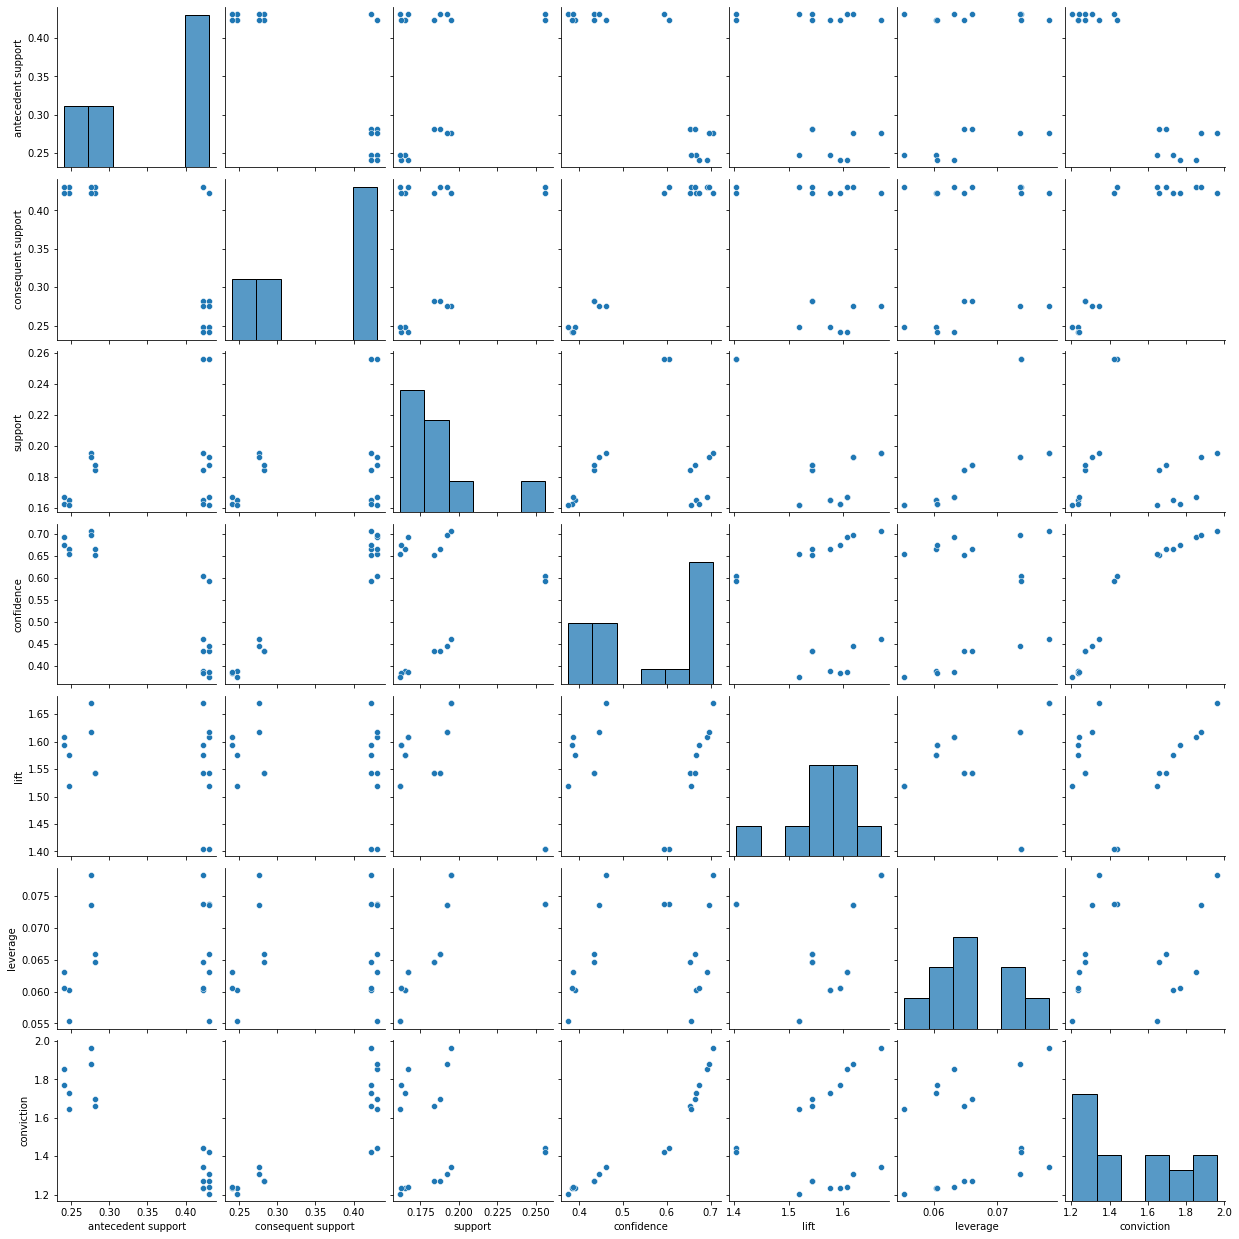

In [16]:
import seaborn as sns
sns.pairplot(result1)

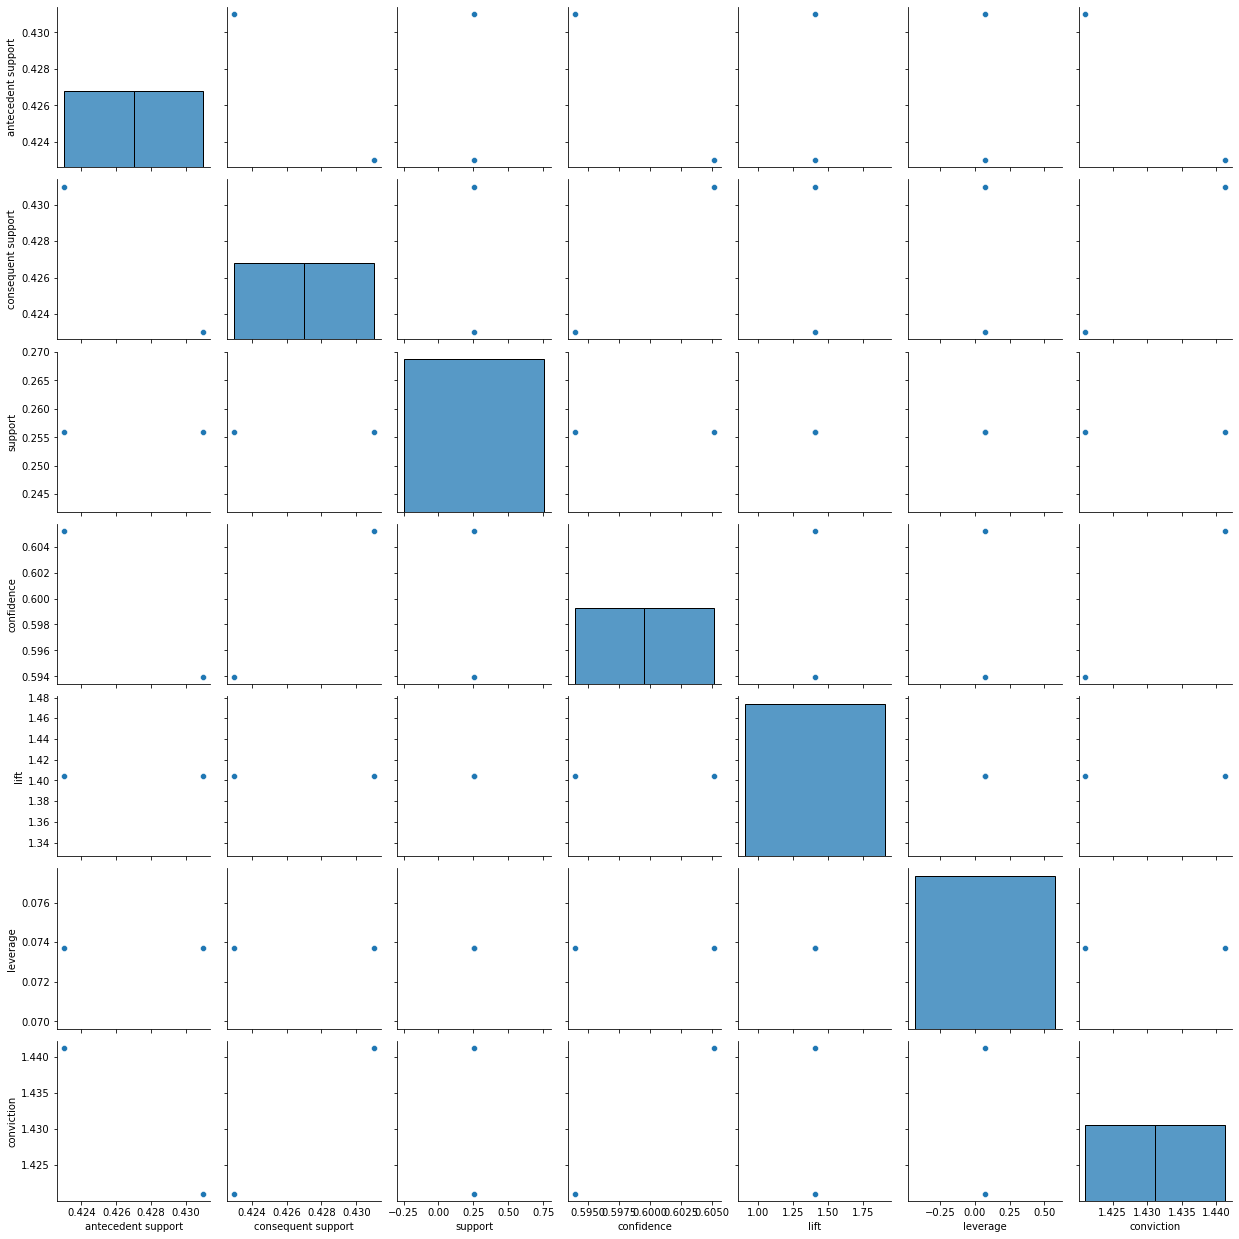

In [17]:
sns.pairplot(result2)

In [18]:
result2= pd.DataFrame(rules2[rules2.lift>1])
result2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [19]:
result1.to_csv('boooks.csv')
vis=pd.read_csv("boooks.csv")
vis

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,frozenset({'ChildBks'}),frozenset({'YouthBks'}),0.4230,0.2475,0.1650,0.390071,1.576044,0.060307,1.233750
1,1,frozenset({'YouthBks'}),frozenset({'ChildBks'}),0.2475,0.4230,0.1650,0.666667,1.576044,0.060307,1.731000
2,2,frozenset({'ChildBks'}),frozenset({'CookBks'}),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,3,frozenset({'CookBks'}),frozenset({'ChildBks'}),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,4,frozenset({'ChildBks'}),frozenset({'DoItYBks'}),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,5,frozenset({'DoItYBks'}),frozenset({'ChildBks'}),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,6,frozenset({'ChildBks'}),frozenset({'ArtBks'}),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
7,7,frozenset({'ArtBks'}),frozenset({'ChildBks'}),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
8,8,frozenset({'GeogBks'}),frozenset({'ChildBks'}),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,9,frozenset({'ChildBks'}),frozenset({'GeogBks'}),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


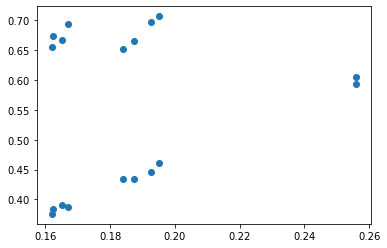

In [20]:
plt.scatter(result1.support,result1.confidence)

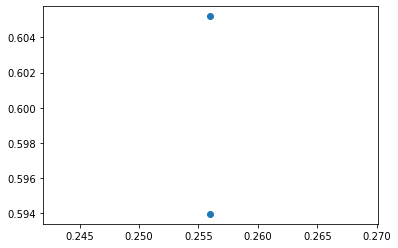

In [21]:
plt.scatter(result2.support,result2.confidence)

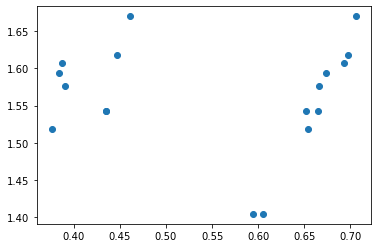

In [22]:
plt.scatter(result1.confidence,result1.lift)

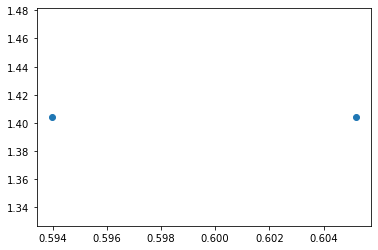

In [23]:
plt.scatter(result2.confidence,result2.lift)

In [24]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

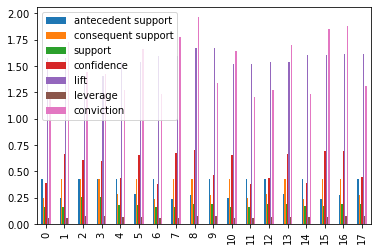

In [25]:
result1.plot(kind="bar")

<AxesSubplot:>

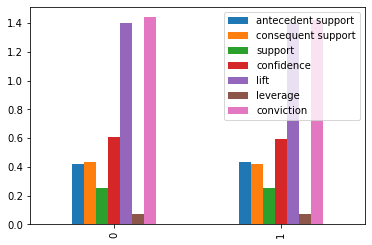

In [26]:
result2.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

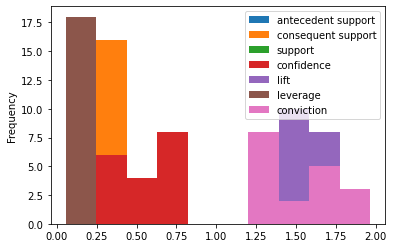

In [27]:
result1.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

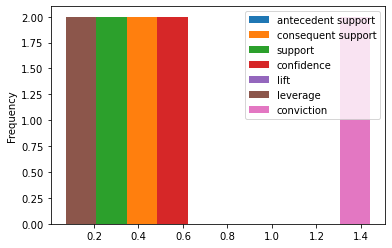

In [28]:
result2.plot(kind='hist')

In [29]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pyvis
from pyvis import network as net
import networkx as nx

In [31]:
g= net.Network(notebook=True)
nxg = nx.complete_graph(18)
g.from_nx(nxg)
g.show('result1.html')

In [32]:
g= net.Network(notebook=True)
nxg= nx.complete_graph(2)
g.from_nx(nxg)
g.show("result2.html")